04 CRC case controls for phekb CRC algorithm

Get a table of the age, sex, age of onset, cases, controls, and cases that are excluded due to monogenic cause. 

Censored age is defined as follows:

cases: censored age = age of onset of CRC (earliest age in EMR)

screened controls: censored age = age at last screening

unscreened controls: censored age = age at consent (from the zip code demographic concept set) 

Standard VM

# Install packages

In [2]:
my.packages <- c('data.table','Hmisc','tidyverse','bigrquery','lubridate')
lapply(my.packages,
       function(pkg) { if(! pkg %in% installed.packages()) { install.packages(pkg)} } )
lapply(my.packages,library,character.only = TRUE)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
✖ purrr::transpose() masks data.table::tran

[[1]]
[1] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[6] "datasets"   "methods"    "base"      

[[2]]
 [1] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

[[3]]
 [1] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
 [6] "tidyr"      "tibble"     "tidyverse"  "Hmisc"      "ggplot2"   
[11] "Formula"    "survival"   "lattice"    "data.table" "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[4]]
 [1] "bigrquery"  "forcats"    "stringr"    "dplyr"      "purrr"     
 [6] "readr"      "tidyr"      "tibble"     "tidyverse"  "Hmisc"     
[11] "ggplot2"    "Formula"    "survival"   "lattice"    "data.table"
[16] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[21] "methods"    "base"      

[[5]]
 [1] "lubridate"  "bigrquery"  "forcats"    "stringr"    "dplyr"     
 [6] "purrr"      "readr"      "tidyr"      "tibble"     "tidyverse" 
[11] "Hmisc"      "ggplot2"    "Formula"    "survival"   "lattice"   
[16] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[21] "datasets"   "methods"    "base"

In [3]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.8.0   bigrquery_1.4.0   forcats_0.5.1     stringr_1.4.0    
 [5] dplyr_1.0.9       purrr_0.3.4       readr_2.1.2       tidyr_1.2.0      
 [9] tibble_3.1.7      tidyverse_1.3.1   Hmisc_4.7-1       ggplot2_3.3.6    
[13] Formula_1.2-4     

# UC/Chron's

In [ ]:
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {condition_82374778_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#condition_82374778_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_82374778/condition_82374778_000000000000.csv"
condition_82374778_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_82374778/condition_82374778_000000000000.csv"
dataset_82374778_condition_df <- read_bq_export_from_workspace_bucket(condition_82374778_path)

dim(dataset_82374778_condition_df)

head(dataset_82374778_condition_df, 5)

In [5]:
# check the conditions to make sure they are as we expect
uc.chron.dt <- data.table(dataset_82374778_condition_df)
describe(uc.chron.dt$standard_concept_name)
describe(uc.chron.dt$source_concept_name)
describe(uc.chron.dt$source_concept_code)


uc.chron.dt$standard_concept_name 
       n  missing distinct 
   56606        0       71 

lowest : Abscess of intestine co-occurrent and due to chronic ulcerative pancolitis                Abscess of intestine co-occurrent and due to Crohn's disease                              Abscess of intestine co-occurrent and due to Crohn's disease of large intestine           Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine Abscess of intestine co-occurrent and due to Crohn's disease of small intestine          
highest: Rectal hemorrhage due to Crohn's disease of small intestine                               Rectal hemorrhage due to inflammatory polyps of colon                                     Rectal hemorrhage due to ulcerative colitis                                               Tuberculous enteritis                                                                     Ulcerative colitis                                                              

uc.chron.dt$source_concept_name 
       n  missing distinct 
   47696     8910      125 

lowest : (Crohn's colitis) or (Crohn's disease of the large bowel NOS)                             Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine Antibiotic enterocolitis                                                                  Chronic ulcerative enterocolitis                                                          Chronic ulcerative ileocolitis                                                           
highest: Ulcerative colitis, unspecified with unspecified complications                            Ulcerative colitis, unspecified, without complications                                    Universal ulcerative (chronic) colitis                                                    Unspecified gastritis and gastroduodenitis, with hemorrhage                               Unspecified gastritis and gastroduodenitis, without mention of hemorrhage         

uc.chron.dt$source_concept_code 
       n  missing distinct 
   47696     8910      131 

lowest : 1085801000119106    13470001            15342002            196731005           196982002          
highest: K57.01              K57.12              K57.40              K91.850             No matching concept

In [6]:
#it's possible that there are records that should not be in here
# 555.0 == K50.00
# 555.1 == K50.10
# 555.2 == K50.80
# 555.9 == K50.90
# 556.* == K51.8, K51.2, K51.3, K51.4, K51.5, K51.0, K51.9
describe(uc.chron.dt$source_concept_code[uc.chron.dt$source_concept_code %like% "K"])

uc.chron.dt$source_concept_code[uc.chron.dt$source_concept_code %like%      "K"] 
       n  missing distinct 
   28057        0       78 

lowest : K29.8   K29.80  K29.81  K29.90  K29.91 
highest: K57.00  K57.01  K57.12  K57.40  K91.850

In [7]:
# what is left if I remove the codes I actually want to keep
describe(uc.chron.dt$standard_concept_name[!(uc.chron.dt$source_concept_code %like% "K5" | 
                                             uc.chron.dt$source_concept_code %like% "555" |
                                             uc.chron.dt$source_concept_code %like% "556")])
# standard concept names for codes other than the ones I know I want to keep
(standard.concept.names <- unique(uc.chron.dt$standard_concept_name[!(uc.chron.dt$source_concept_code %like% "K5" | 
                                             uc.chron.dt$source_concept_code %like% "555" |
                                             uc.chron.dt$source_concept_code %like% "556")]))

uc.chron.dt$standard_concept_name[!(uc.chron.dt$source_concept_code %like%      "K5" | uc.chron.dt$source_concept_code %like% "555" | uc.chron.dt$source_concept_code %like%      "556")] 
       n  missing distinct 
   14722        0       30 

lowest : Abscess of intestine co-occurrent and due to Crohn's disease                              Abscess of intestine co-occurrent and due to Crohn's disease of large intestine           Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine Abscess of intestine co-occurrent and due to Crohn's disease of small intestine           Antibiotic enterocolitis                                                                 
highest: Hemorrhagic duodenitis                                                                    Ileal pouchitis                                                                           Ileitis                                                                                   Radiation enteroco

[1] "Crohn's disease"                                                                          
 [2] "Gastroduodenitis"                                                                         
 [3] "Crohn's disease of small intestine"                                                       
 [4] "Duodenitis"                                                                               
 [5] "Crohn's disease of small AND large intestines"                                            
 [6] "Crohn's disease of large bowel"                                                           
 [7] "Enteritis caused by protozoan"                                                            
 [8] "Chronic ulcerative enterocolitis"                                                         
 [9] "Diverticulitis of small intestine"                                                        
[10] "Ileal pouchitis"                                                                          
[11] "Enterocolitis"                                                                            
[12] "Eosinophilic gastroenteritis"                                                             
[13] "Abscess of intestine co-occurrent and due to Crohn's disease"                             
[14] "Crohn's disease of colon"                                                                 
[15] "Hemorrhagic duodenitis"                                                                   
[16] "Radiation enterocolitis"                                                                  
[17] "Abscess of intestine co-occurrent and due to Crohn's disease of large intestine"          
[18] "Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine"
[19] "Abscess of intestine co-occurrent and due to Crohn's disease of small intestine"          
[20] "Tuberculous enteritis"                                                                    
[21] "Diverticulitis of small intestine with perforation and abscess"                           
[22] "Chronic ulcerative ileocolitis"                                                           
[23] "Enteritis of small intestine"                                                             
[24] "Crohn's disease of rectum"                                                                
[25] "Duodenitis caused by Helicobacter pylori"                                                 
[26] "Ileitis"                                                                                  
[27] "Antibiotic enterocolitis"                                                                 
[28] "Crohn disease of anal canal"                                                              
[29] "Crohn's disease of ileum"                                                                 
[30] "Crohn's disease of intestine"

In [8]:
describe(uc.chron.dt$source_concept_name[!(uc.chron.dt$source_concept_code %like% "K5" | 
                                             uc.chron.dt$source_concept_code %like% "555" |
                                             uc.chron.dt$source_concept_code %like% "556")])
# source concept names for codes other than the ones I know I want to keep
(source.concept.names <- (unique(uc.chron.dt$source_concept_name[!(uc.chron.dt$source_concept_code %like% "K5" | 
                                             uc.chron.dt$source_concept_code %like% "555" |
                                             uc.chron.dt$source_concept_code %like% "556")])))

uc.chron.dt$source_concept_name[!(uc.chron.dt$source_concept_code %like%      "K5" | uc.chron.dt$source_concept_code %like% "555" | uc.chron.dt$source_concept_code %like%      "556")] 
       n  missing distinct 
    5812     8910       41 

lowest : (Crohn's colitis) or (Crohn's disease of the large bowel NOS)                             Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine Antibiotic enterocolitis                                                                  Chronic ulcerative enterocolitis                                                          Chronic ulcerative ileocolitis                                                           
highest: Other complications of intestinal pouch                                                   Pouchitis                                                                                 Radiation enterocolitis                                                                   Unspecified gastriti

[1] "Crohn's disease"                                                                          
 [2] "Unspecified gastritis and gastroduodenitis, with hemorrhage"                              
 [3] "Crohn's disease of small intestine"                                                       
 [4] "Duodenitis, without mention of hemorrhage"                                                
 [5] "Unspecified gastritis and gastroduodenitis, without mention of hemorrhage"                
 [6] "Crohn's disease of small AND large intestines"                                            
 [7] NA                                                                                         
 [8] "Duodenitis without bleeding"                                                              
 [9] "Crohn's disease of large bowel"                                                           
[10] "Gastroduodenitis, unspecified, without bleeding"                                          
[11] "Enteritis caused by protozoan"                                                            
[12] "Chronic ulcerative enterocolitis"                                                         
[13] "Diverticulitis of small intestine (without mention of hemorrhage)"                        
[14] "Pouchitis"                                                                                
[15] "Enterocolitis"                                                                            
[16] "Duodenitis"                                                                               
[17] "Eosinophilic gastroenteritis"                                                             
[18] "Gastroduodenitis"                                                                         
[19] "(Crohn's colitis) or (Crohn's disease of the large bowel NOS)"                            
[20] "Other complications of intestinal pouch"                                                  
[21] "Diverticulitis of small intestine"                                                        
[22] "Duodenitis, with hemorrhage"                                                              
[23] "Duodenitis with bleeding"                                                                 
[24] "Gastroenteritis and colitis due to radiation"                                             
[25] "Ileal pouchitis"                                                                          
[26] "Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine"
[27] "Gastritis and duodenitis"                                                                 
[28] "Gastroduodenitis, unspecified, with bleeding"                                             
[29] "Crohn's disease of colon"                                                                 
[30] "Hemorrhagic duodenitis"                                                                   
[31] "Chronic ulcerative ileocolitis"                                                           
[32] "Diverticulitis of colon with hemorrhage"                                                  
[33] "Enteritis of small intestine"                                                             
[34] "Crohn's disease of rectum"                                                                
[35] "Duodenitis caused by Helicobacter pylori"                                                 
[36] "Ileitis"                                                                                  
[37] "No matching concept"                                                                      
[38] "Antibiotic enterocolitis"                                                                 
[39] "Crohn disease of anal canal"                                                              
[40] "Crohn's disease of ileum"                                                                 
[41] "Radiation enterocolitis"                                                                  
[42] "Crohn's disease of

In [9]:
(all.names <- t(t(unique(sort(c(standard.concept.names,source.concept.names))))))


(Crohn's colitis) or (Crohn's disease of the large bowel NOS)
Abscess of intestine co-occurrent and due to Crohn's disease
Abscess of intestine co-occurrent and due to Crohn's disease of large intestine
Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine
Abscess of intestine co-occurrent and due to Crohn's disease of small intestine
Antibiotic enterocolitis
Chronic ulcerative enterocolitis
Chronic ulcerative ileocolitis
Crohn disease of anal canal
Crohn's disease
Crohn's disease of colon


In [10]:
# after consulting with Gail, the following should be removed
# also need to check on "No matching concept

rm.names <- c("Antibiotic enterocolitis","Diverticulitis of colon with hemorrhage",
              "Diverticulitis of small intestine","Diverticulitis of small intestine (without mention of hemorrhage)",
              "Diverticulitis of small intestine with perforation and abscess","Duodenitis",
              "Duodenitis caused by Helicobacter pylori","Duodenitis with bleeding","Duodenitis without bleeding",
              "Duodenitis, with hemorrhage","Duodenitis, without mention of hemorrhage","Enteritis caused by protozoan",
              "Enteritis of small intestine","Enterocolitis","Eosinophilic gastroenteritis","Gastritis and duodenitis",
              "Gastroduodenitis","Gastroduodenitis, unspecified, with bleeding",
              "Gastroduodenitis, unspecified, without bleeding","Gastroenteritis and colitis due to radiation",
              "Hemorrhagic duodenitis","Ileal pouchitis","Ileitis","Other complications of intestinal pouch",
              "Pouchitis","Radiation enterocolitis","Tuberculous enteritis",
              "Unspecified gastritis and gastroduodenitis, with hemorrhage",
              "Unspecified gastritis and gastroduodenitis, without mention of hemorrhage")
uc.chron.dt <- uc.chron.dt[][!(uc.chron.dt$source_concept_name %in% rm.names | 
                               uc.chron.dt$standard_concept_name %in% rm.names)]
length(uc.chron.dt$person_id)

[1] 52400

In [ ]:
# check the non matching concept names
uc.chron.dt[][uc.chron.dt$source_concept_name == "No matching concept" | 
              uc.chron.dt$standard_concept_name == "No matching concept"]
# these look legitimate and I will keep them

In [12]:
# review what remains
describe(uc.chron.dt$source_concept_code)
length(unique(uc.chron.dt$source_concept_name))
length(unique(uc.chron.dt$standard_concept_name))
sort(unique(uc.chron.dt$source_concept_name))
sort(unique(uc.chron.dt$standard_concept_name))

uc.chron.dt$source_concept_code 
       n  missing distinct 
   43924     8476       96 

lowest : 1085801000119106    13470001            15342002            196982002           34000006           
highest: K51.914             K51.918             K51.919             K57.40              No matching concept

[1] 95

[1] 56

[1] "(Crohn's colitis) or (Crohn's disease of the large bowel NOS)"                                 
 [2] "Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine"     
 [3] "Chronic ulcerative enterocolitis"                                                              
 [4] "Chronic ulcerative ileocolitis"                                                                
 [5] "Crohn disease of anal canal"                                                                   
 [6] "Crohn's disease"                                                                               
 [7] "Crohn's disease of both small and large intestine with abscess"                                
 [8] "Crohn's disease of both small and large intestine with fistula"                                
 [9] "Crohn's disease of both small and large intestine with intestinal obstruction"                 
[10] "Crohn's disease of both small and large intestine with other complication"                     
[11] "Crohn's disease of both small and large intestine with rectal bleeding"                        
[12] "Crohn's disease of both small and large intestine with unspecified complications"              
[13] "Crohn's disease of both small and large intestine without complications"                       
[14] "Crohn's disease of colon"                                                                      
[15] "Crohn's disease of ileum"                                                                      
[16] "Crohn's disease of intestine"                                                                  
[17] "Crohn's disease of large bowel"                                                                
[18] "Crohn's disease of large intestine with abscess"                                               
[19] "Crohn's disease of large intestine with fistula"                                               
[20] "Crohn's disease of large intestine with intestinal obstruction"                                
[21] "Crohn's disease of large intestine with other complication"                                    
[22] "Crohn's disease of large intestine with rectal bleeding"                                       
[23] "Crohn's disease of large intestine with unspecified complications"                             
[24] "Crohn's disease of large intestine without complications"                                      
[25] "Crohn's disease of rectum"                                                                     
[26] "Crohn's disease of small AND large intestines"                                                 
[27] "Crohn's disease of small intestine"                                                            
[28] "Crohn's disease of small intestine with abscess"                                               
[29] "Crohn's disease of small intestine with fistula"                                               
[30] "Crohn's disease of small intestine with intestinal obstruction"                                
[31] "Crohn's disease of small intestine with other complication"                                    
[32] "Crohn's disease of small intestine with rectal bleeding"                                       
[33] "Crohn's disease of small intestine with unspecified complications"                             
[34] "Crohn's disease of small intestine without complications"                                      
[35] "Crohn's disease, unspecified, with abscess"                                                    
[36] "Crohn's disease, unspecified, with fistula"                                                    
[37] "Crohn's disease, unspecified, with intestinal obstruction"                                     
[38] "Crohn's disease, unspecified, with other complication"                                         
[39] "Crohn's disease, unspecified, with rectal bleeding"                                            
[40] "Crohn's disease, 

[1] "Abscess of intestine co-occurrent and due to chronic ulcerative pancolitis"               
 [2] "Abscess of intestine co-occurrent and due to Crohn's disease"                             
 [3] "Abscess of intestine co-occurrent and due to Crohn's disease of large intestine"          
 [4] "Abscess of intestine co-occurrent and due to Crohn's disease of small and large intestine"
 [5] "Abscess of intestine co-occurrent and due to Crohn's disease of small intestine"          
 [6] "Abscess of intestine co-occurrent and due to ulcerative colitis"                          
 [7] "Chronic left-sided ulcerative colitis"                                                    
 [8] "Chronic ulcerative colitis"                                                               
 [9] "Chronic ulcerative enterocolitis"                                                         
[10] "Chronic ulcerative ileocolitis"                                                           
[11] "Chronic ulcerative pancolitis"                                                            
[12] "Chronic ulcerative proctitis"                                                             
[13] "Chronic ulcerative rectosigmoiditis"                                                      
[14] "Complication due to chronic ulcerative pancolitis"                                        
[15] "Complication due to chronic ulcerative proctitis"                                         
[16] "Complication due to chronic ulcerative rectosigmoiditis"                                  
[17] "Complication due to colonic inflammatory polyps"                                          
[18] "Complication due to Crohn's disease"                                                      
[19] "Complication due to Crohn's disease of large intestine"                                   
[20] "Complication due to Crohn's disease of small and large intestines"                        
[21] "Complication due to Crohn's disease of small intestine"                                   
[22] "Complication due to ulcerative colitis"                                                   
[23] "Crohn disease of anal canal"                                                              
[24] "Crohn's disease"                                                                          
[25] "Crohn's disease of colon"                                                                 
[26] "Crohn's disease of ileum"                                                                 
[27] "Crohn's disease of intestine"                                                             
[28] "Crohn's disease of large bowel"                                                           
[29] "Crohn's disease of rectum"                                                                
[30] "Crohn's disease of small AND large intestines"                                            
[31] "Crohn's disease of small intestine"                                                       
[32] "Diverticulitis of small and large intestine with perforation"                             
[33] "Fistula of intestine"                                                                     
[34] "Fistula of intestine due to chronic ulcerative pancolitis"                                
[35] "Fistula of intestine due to Crohn's disease of small and large intestine"                 
[36] "Fistula of intestine due to ulcerative colitis"                                           
[37] "Fistula of large intestine due to Crohn's disease"                                        
[38] "Fistula of small intestine due to Crohn's disease"                                        
[39] "Intestinal obstruction due to chronic ulcerative pancolitis"                              
[40] "Intestinal obstruction due to Crohn's disease"                                            
[41] "Intestinal obstruction due to Crohn's disease of large intestine"                         
[42] "Intestinal obstruc

In [13]:
# need to check the records that match the term 'polyp' to see if the ICD9/10 codes are correct
describe(uc.chron.dt$condition_source_value[uc.chron.dt$source_concept_name %like% "polyp"])
describe(uc.chron.dt$condition_source_value[uc.chron.dt$standard_concept_name %like% "polyp"])
# these are all legitimate UC ICD9/10 codes

uc.chron.dt$condition_source_value[uc.chron.dt$source_concept_name %like%      "polyp"] 
       n  missing distinct 
     179        0        4 
                                          
Value        556.4  K51.40 K51.411 K51.419
Frequency       46     119      13       1
Proportion   0.257   0.665   0.073   0.006

uc.chron.dt$condition_source_value[uc.chron.dt$standard_concept_name %like%      "polyp"] 
       n  missing distinct 
     179        0        4 
                                          
Value        556.4  K51.40 K51.411 K51.419
Frequency       46     119      13       1
Proportion   0.257   0.665   0.073   0.006

In [14]:
# need to check the records that don't match polyp, chron or ulcer
sort(unique(uc.chron.dt$source_concept_name[!(uc.chron.dt$source_concept_name %like% "Crohn" | 
                                            uc.chron.dt$source_concept_name %like% "ulcer" | 
                                            uc.chron.dt$source_concept_name %like% "Ulcer" |
                                            uc.chron.dt$source_concept_name %like% "polyp" )]))
sort(unique(uc.chron.dt$standard_concept_name[!(uc.chron.dt$standard_concept_name %like% "Crohn" | 
                                            uc.chron.dt$standard_concept_name %like% "ulcer" |
                                              uc.chron.dt$standard_concept_name %like% "Ulcer" |
                                              uc.chron.dt$standard_concept_name %like% "polyp" )]))
sort(unique(uc.chron.dt$condition_source_value[!(uc.chron.dt$source_concept_name %like% "Crohn" | 
                                            uc.chron.dt$source_concept_name %like% "ulcer" | 
                                            uc.chron.dt$source_concept_name %like% "Ulcer" |
                                            uc.chron.dt$source_concept_name %like% "polyp" )]))

describe(uc.chron.dt$condition_source_value[!(uc.chron.dt$standard_concept_name %like% "Crohn" | 
                                            uc.chron.dt$standard_concept_name %like% "ulcer" |
                                              uc.chron.dt$standard_concept_name %like% "Ulcer" |
                                              uc.chron.dt$standard_concept_name %like% "polyp" )])

#K57.40 needs to be remove

[1] "Diverticulitis of both small and large intestine with perforation and abscess without bleeding"
 [2] "Left sided colitis with intestinal obstruction"                                                
 [3] "Left sided colitis with other complication"                                                    
 [4] "Left sided colitis with rectal bleeding"                                                       
 [5] "Left sided colitis with unspecified complications"                                             
 [6] "Left sided colitis without complications"                                                      
 [7] "No matching concept"                                                                           
 [8] "Regional enteritis of large intestine"                                                         
 [9] "Regional enteritis of small intestine"                                                         
[10] "Regional enteritis of small intestine with large intestine"                                    
[11] "Regional enteritis of unspecified site"

[1] "Diverticulitis of small and large intestine with perforation"
[2] "Fistula of intestine"

[1] "555.0"               "555.1"               "555.2"              
 [4] "555.9"               "K51.50"              "K51.511"            
 [7] "K51.512"             "K51.518"             "K51.519"            
[10] "K57.40"              "No matching concept"

uc.chron.dt$condition_source_value[!(uc.chron.dt$standard_concept_name %like%      "Crohn" | uc.chron.dt$standard_concept_name %like% "ulcer" |      uc.chron.dt$standard_concept_name %like% "Ulcer" | uc.chron.dt$standard_concept_name %like%      "polyp")] 
       n  missing distinct 
     199        0        2 
                          
Value      K50.913  K57.40
Frequency      190       9
Proportion   0.955   0.045

In [15]:
#K57.40 needs to be remove
uc.chron.dt <- uc.chron.dt[][uc.chron.dt$condition_source_value != "K57.40"]
length(uc.chron.dt$person_id)
length(unique(uc.chron.dt$person_id))

[1] 43915

[1] 1223

In [16]:
# count unique records for each participant to see the distribution of the record counts
setkeyv(uc.chron.dt, c("person_id","condition_start_datetime"))
uc.chron.dt <- unique(uc.chron.dt,by=c("person_id","condition_start_datetime"))
uc.chron.dt[,count:=length(condition_start_datetime),by=person_id]
describe(uc.chron.dt$count)
length(unique(uc.chron.dt$person_id[uc.chron.dt$count==1]))
length(unique(uc.chron.dt$person_id[uc.chron.dt$count>1]))

uc.chron.dt$count 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   25851        0      129        1    83.11    76.93        6       13 
     .25      .50      .75      .90      .95 
      32       62      103      193      254 

lowest :   1   2   3   4   5, highest: 254 275 291 332 370

[1] 366

[1] 857

In [17]:
# have two sets of IDs.
############
## uc.chron.ids.set1 := participants with 1 or more records indicating UC/Chron's
## uc.chron.ids.set2 := participants with 2 or more records indicating UC/Chron's
###########
uc.chron.ids.set1 <- unique(uc.chron.dt$person_id)
uc.chron.ids.set2 <- unique(uc.chron.dt$person_id[uc.chron.dt$count>1])

length(uc.chron.ids.set1)
length(uc.chron.ids.set2)


[1] 1223

[1] 857

# Heritable CRC cases

In [ ]:
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {condition_67122249_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#condition_67122249_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_67122249/condition_67122249_000000000000.csv"
condition_67122249_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_67122249/condition_67122249_000000000000.csv"
dataset_67122249_condition_df <- read_bq_export_from_workspace_bucket(condition_67122249_path)

dim(dataset_67122249_condition_df)

head(dataset_67122249_condition_df, 5)

In [19]:
herit.crc.dt <- data.table(dataset_67122249_condition_df)
herit.crc.ids <- unique(herit.crc.dt$person_id)
length(herit.crc.ids)
unique(herit.crc.dt$standard_concept_name)

[1] 8

[1] "HNPCC - hereditary nonpolyposis colon cancer"                
[2] "Lynch syndrome"                                              
[3] "Familial multiple polyposis syndrome"                        
[4] "Hereditary non-polyposis colon cancer gene mutation positive"

# CRC cases

Get the cases

remove anyone with UC/Chron's or who has heritable CRC. These are the larger set of cases. 

case.set1 := All participants who have 1 or more CRC record, but not inherited

case.set2 := case.set1 removing amyone with 1 or more UC/Chron's records

case.set3 := case.set1, running pheKB algorithm, NOT removing UC/Chron's

case.set4 := caset.set3 removing anyone with 1 or more UC/Chron's records

case.set5 := case.set3 removing anyone with 2 or more UC/Chron's records


Cleaned set according the PheKB algorithm:

1. CRC Dx with surgical procedure within (<=) 12 months after diagnosis (keep.set1)

2. CRC Dx with chemo or radiation within (<=) 12 months after diagnosis. Remove anyone with any other type of cancer (keep.set.2.3)

3. CRC Dx more than once within (<=) 24 months from each other (set.24)
 

In [ ]:
########################
# WGS table 5.2.A codes
#######################
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {condition_64590476_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}

#condition_64590476_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_64590476/condition_64590476_000000000000.csv"
condition_64590476_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_64590476/condition_64590476_000000000000.csv"

dataset_64590476_condition_df <- read_bq_export_from_workspace_bucket(condition_64590476_path)

dim(dataset_64590476_condition_df)

head(dataset_64590476_condition_df, 5)

#######################
# table 5.2.B (CRC surgical procedures)
#######################

read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#procedure_49886901_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_49886901/procedure_49886901_000000000000.csv"
procedure_49886901_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_49886901/procedure_49886901_000000000000.csv"
dataset_49886901_procedure_df <- read_bq_export_from_workspace_bucket(procedure_49886901_path)

dim(dataset_49886901_procedure_df)

head(dataset_49886901_procedure_df, 5)

########################
#table 5.3.A, chemo and radiation
########################
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#procedure_00392581_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_00392581/procedure_00392581_000000000000.csv"
procedure_00392581_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_00392581/procedure_00392581_000000000000.csv"
dataset_00392581_procedure_df <- read_bq_export_from_workspace_bucket(procedure_00392581_path)

dim(dataset_00392581_procedure_df)

head(dataset_00392581_procedure_df, 5)

read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#drug_00392581_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/drug_00392581/drug_00392581_000000000000.csv"
drug_00392581_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/drug_00392581/drug_00392581_000000000000.csv"
dataset_00392581_drug_df <- read_bq_export_from_workspace_bucket(drug_00392581_path)

dim(dataset_00392581_drug_df)

head(dataset_00392581_drug_df, 5)

In [21]:
crc.codes.dt <- data.table(dataset_64590476_condition_df)
crc.surgery.dt <- data.table(dataset_49886901_procedure_df)
crc.chemo.radio1.dt <- data.table(dataset_00392581_procedure_df)
crc.chemo.radio2.dt <- data.table(dataset_00392581_drug_df)

In [22]:
# how many potential CRC cases are there, before using the algorithm
length(unique(crc.codes.dt$person_id))
# remove participants that have inherited CRC
case.set1 <- setdiff(unique(crc.codes.dt$person_id), herit.crc.ids)
length(case.set1)

# number of participants if remove participants with UC/Chron's. 
# there are two sets (the full set and the one where the participants must have 2 or more records)
length(setdiff(case.set1, uc.chron.ids.set1))
length(setdiff(case.set1, uc.chron.ids.set2))

case.set2 <- setdiff(case.set1, uc.chron.ids.set1)
length(case.set2)

[1] 670

[1] 668

[1] 640

[1] 650

[1] 640

In [23]:
# get the date for the first CRC diagnosis
crc.codes.dt[,condition_start_datetime:=as.Date(condition_start_datetime)]
crc.codes.dt[,min_start:=min(condition_start_datetime),by=person_id]
length(crc.codes.dt$person_id)
length(unique(crc.codes.dt$person_id))

#keep just the earliest start time
crc.codes.dt <- crc.codes.dt[][crc.codes.dt$condition_start_datetime == crc.codes.dt$min_start]
length(crc.codes.dt$person_id)
length(unique(crc.codes.dt$person_id))

# get the unique set of records by person and earliest start time
crc.codes.dt <- unique(crc.codes.dt,by=c("person_id","min_start"))
length(crc.codes.dt$person_id)

describe(crc.codes.dt$min_start)

[1] 15226

[1] 670

[1] 999

[1] 670

[1] 670

crc.codes.dt$min_start 
         n    missing   distinct       Info       Mean        Gmd        .05 
       670          0        601          1 2013-11-13       2163 2002-10-21 
       .10        .25        .50        .75        .90        .95 
2006-04-29 2011-07-21 2014-08-17 2018-03-05 2019-10-07 2020-03-28 

lowest : 1991-12-10 1992-02-25 1993-02-05 1993-04-06 1995-11-06
highest: 2021-02-10 2021-02-14 2021-02-28 2021-03-29 2021-04-01

In [24]:
# set up the data tables to compare time from CRC Dx in the surgical procedures and the chemo.radiation
crc.surgery.dt[,surgery_datetime:=as.Date(procedure_datetime)]
crc.chemo.radio1.dt[,chemo_datetime:=as.Date(procedure_datetime)]
crc.chemo.radio2.dt[,drug_exposure_start_datetime:=as.Date(drug_exposure_start_datetime)]

#remove extraneous columns to make it easier to merge datasets
crc.dx.dt <- crc.codes.dt[,list(person_id,condition_start_datetime)]
crc.surgery.time <- crc.surgery.dt[,list(person_id,surgery_datetime)]
crc.chemo.radio1.time <- crc.chemo.radio1.dt[,list(person_id,chemo_datetime)]
crc.chemo.radio2.time <- crc.chemo.radio2.dt[,list(person_id,drug_exposure_start_datetime)]



In [ ]:
# merge1 (CRC surgery) (tried to merge all the datasets together, but I ran into issues.) 
setkey(crc.dx.dt,"person_id")
setkey(crc.surgery.time,"person_id")

merge1 <- crc.surgery.time[crc.dx.dt]
describe(merge1)

merge1[,time.months:=as.duration(as.period(interval(start=condition_start_datetime, end=surgery_datetime)))/dmonths(x = 1)]

describe(merge1$time.months)
length(unique(merge1$person_id[merge1$time.months >=0 & merge1$time.months<=12 & !is.na(merge1$time.months)]))
keep.set1 <- unique(merge1$person_id[merge1$time.months >=0 & merge1$time.months<=12 & !is.na(merge1$time.months)])
describe(keep.set1)

In [ ]:
# merge2 (radiation/chemo)
setkey(crc.chemo.radio1.time,"person_id")
merge2 <- crc.chemo.radio1.time[crc.dx.dt]
describe(merge2)

merge2[,time.months:=as.duration(as.period(interval(start=condition_start_datetime, end=chemo_datetime)))/dmonths(x = 1)]

describe(merge2$time.months)

length(unique(merge2$person_id[merge2$time.months >=0 & merge2$time.months<=12 & !is.na(merge2$time.months)]))
keep.set2 <- unique(merge2$person_id[merge2$time.months >=0 & merge2$time.months<=12 & !is.na(merge2$time.months)])
describe(keep.set2)

In [27]:
#what is the overlap between sets 1 and 2
length(intersect(keep.set1,keep.set2))

[1] 20

In [ ]:
# merge 3 (radiation/chemo drugs)
setkey(crc.chemo.radio2.time,"person_id")
merge3 <- crc.chemo.radio2.time[crc.dx.dt]
describe(merge3)

merge3[,time.months:= as.duration(as.period(interval(start=condition_start_datetime, end=drug_exposure_start_datetime)))
       /dmonths(x = 1)]

describe(merge3$time.months)
length(unique(merge3$person_id[merge3$time.months >=0 & merge3$time.months<=12 & !is.na(merge3$time.months)]))
keep.set3 <- unique(merge3$person_id[merge3$time.months >=0 & merge3$time.months<=12 & !is.na(merge3$time.months)])
describe(keep.set3)

In [29]:
#what is the overlap between sets 1, and 3
length(intersect(keep.set1,keep.set3))
length(intersect(keep.set2,keep.set3))
length(intersect(intersect(keep.set1,keep.set2),keep.set3))
length(unique(c(keep.set1,keep.set2,keep.set3)))

[1] 49

[1] 65

[1] 18

[1] 275

In [ ]:
# remove anyone with other types of cancers from keep.set2 and keep.set3
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {condition_80860798_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#condition_80860798_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_80860798/condition_80860798_000000000000.csv"
condition_80860798_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/condition_80860798/condition_80860798_000000000000.csv"
dataset_80860798_condition_df <- read_bq_export_from_workspace_bucket(condition_80860798_path)

dim(dataset_80860798_condition_df)

head(dataset_80860798_condition_df, 5)

In [31]:
other.cancer.dt <- data.table(dataset_80860798_condition_df)

In [32]:
# The other cancers concept set seems to contain CRCs. I need to remove these records
# remove the CRC codes that exist in the CRC data
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))
crc.code.names <- dataset_64590476_condition_df$standard_concept_name
describe(crc.code.names)
crc.code.names <- setdiff(crc.code.names,"No matching concept")
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$standard_concept_name  %in% crc.code.names)]

crc.code.names2 <- dataset_64590476_condition_df$source_concept_name
describe(crc.code.names2)
crc.code.names2 <- setdiff(crc.code.names2,"No matching concept")
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_name  %in% crc.code.names2)]

length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))

describe(other.cancer.dt$standard_concept_name[other.cancer.dt$condition_source_value %like% "153"])
describe(other.cancer.dt$standard_concept_name[other.cancer.dt$condition_source_value %like% "C18"])

[1] 631490

[1] 12487

crc.code.names 
       n  missing distinct 
   15226        0       24 

lowest : Carcinoma of colon                                     HNPCC - hereditary nonpolyposis colon cancer           Malignant carcinoid tumor of colon                     Malignant neoplasm, overlapping lesion of colon        Malignant tumor of ascending colon                    
highest: Primary malignant neoplasm of large intestine          Primary malignant neoplasm of rectosigmoid junction    Primary malignant neoplasm of sigmoid colon            Primary malignant neoplasm of splenic flexure of colon Primary malignant neoplasm of transverse colon        

crc.code.names2 
       n  missing distinct 
   12123     3103       21 

lowest : Carcinoma of colon                              HNPCC - hereditary nonpolyposis colon cancer    Malignant carcinoid tumor of the appendix       Malignant carcinoid tumor of the cecum          Malignant neoplasm of appendix                 
highest: Malignant neoplasm of splenic flexure           Malignant neoplasm of transverse colon          Malignant neoplasm, overlapping lesion of colon No matching concept                             Primary malignant neoplasm of colon            

[1] 455884

[1] 10118

other.cancer.dt$standard_concept_name[other.cancer.dt$condition_source_value %like%      "153"] 
       n  missing distinct 
      51        0        2 
                                                                      
Value                                Adenocarcinoma of lower esophagus
Frequency                                            1                
Proportion                                          0.02              
                                                                      
Value      Malignant neoplasm of lower-inner quadrant of female breast
Frequency                                           50                
Proportion                                          0.98              

 
NULL


In [ ]:
# are there ICD9 or 10 codes that I don't want?
# ICD9 codes that I want to keep
# [140 - 152), [155-166), [170,177), [179,209)
icd9.rm.dt <- other.cancer.dt[][other.cancer.dt$source_vocabulary %like% "ICD9" & 
                                (other.cancer.dt$condition_source_value < 140 | 
                    (other.cancer.dt$condition_source_value >=152 & other.cancer.dt$condition_source_value < 155) |
                    (other.cancer.dt$condition_source_value >=166 & other.cancer.dt$condition_source_value < 170) |
                    (other.cancer.dt$condition_source_value >=177 & other.cancer.dt$condition_source_value < 179) |
                    other.cancer.dt$condition_source_value >= 209)]
head(icd9.rm.dt)

icd9.keep.dt <-  other.cancer.dt[][other.cancer.dt$source_vocabulary %like% "ICD9" &  
                    ((other.cancer.dt$condition_source_value >=140 & other.cancer.dt$condition_source_value < 152) |
                    (other.cancer.dt$condition_source_value >=155 & other.cancer.dt$condition_source_value < 166) |
                    (other.cancer.dt$condition_source_value >=170 & other.cancer.dt$condition_source_value < 177) |
                    (other.cancer.dt$condition_source_value >=179 & other.cancer.dt$condition_source_value < 209))]


In [34]:
# get the standard and source concept names that match the ones I want to remove so I can remove those
(standard.concept.set1.1 <- unique(icd9.rm.dt$standard_concept_name))
standard.concept.set2.1 <- unique(icd9.keep.dt$standard_concept_name)
length(standard.concept.set1.1)
length(standard.concept.set2.1)
length(setdiff(standard.concept.set1.1, standard.concept.set2.1))
(rm.concepts <- setdiff(standard.concept.set1.1, standard.concept.set2.1))

source.concept.set1.1 <- unique(icd9.rm.dt$source_concept_name)
source.concept.set2.1 <- unique(icd9.keep.dt$source_concept_name)
length(source.concept.set1.1)
length(source.concept.set2.1)
length(setdiff(source.concept.set1.1, source.concept.set2.1))
(rm.concepts2 <- setdiff(source.concept.set1.1, source.concept.set2.1))

[1] "Primary malignant neoplasm of anus"                          
 [2] "Malignant neoplasm of rectum, rectosigmoid junction and anus"
 [3] "Malignant carcinoid tumor of small intestine"                
 [4] "Primary malignant neoplasm of anal canal"                    
 [5] "Primary malignant neoplasm of small intestine"               
 [6] "Plasma cell neoplasm"                                        
 [7] "Secondary malignant neoplasm of lymph node"                  
 [8] "Primary malignant neoplasm of duodenum"                      
 [9] "Malignant carcinoid tumor of bronchus"                       
[10] "Refractory anemia (clinical)"                                
[11] "Malignant carcinoid tumor of stomach"                        
[12] "Primary malignant neoplasm of jejunum"                       
[13] "Primary malignant neoplasm of ileum"                         
[14] "Merkel cell carcinoma"                                       
[15] "Secondary malignant neoplasm of peritoneum"                  
[16] "Malignant carcinoid tumor of rectum"                         
[17] "Primary malignant neoplasm of gastrointestinal tract"        
[18] "Primary malignant neoplasm of rectum"                        
[19] "Essential thrombocythemia"                                   
[20] "Myelodysplastic syndrome (clinical)"

[1] 20

[1] 440

[1] 19

[1] "Primary malignant neoplasm of anus"                          
 [2] "Malignant neoplasm of rectum, rectosigmoid junction and anus"
 [3] "Malignant carcinoid tumor of small intestine"                
 [4] "Primary malignant neoplasm of anal canal"                    
 [5] "Primary malignant neoplasm of small intestine"               
 [6] "Plasma cell neoplasm"                                        
 [7] "Primary malignant neoplasm of duodenum"                      
 [8] "Malignant carcinoid tumor of bronchus"                       
 [9] "Refractory anemia (clinical)"                                
[10] "Malignant carcinoid tumor of stomach"                        
[11] "Primary malignant neoplasm of jejunum"                       
[12] "Primary malignant neoplasm of ileum"                         
[13] "Merkel cell carcinoma"                                       
[14] "Secondary malignant neoplasm of peritoneum"                  
[15] "Malignant carcinoid tumor of rectum"                         
[16] "Primary malignant neoplasm of gastrointestinal tract"        
[17] "Primary malignant neoplasm of rectum"                        
[18] "Essential thrombocythemia"                                   
[19] "Myelodysplastic syndrome (clinical)"

[1] 21

[1] 465

[1] 21

[1] "Malignant neoplasm of anus, unspecified site"                                
 [2] "Malignant neoplasm of other sites of rectum, rectosigmoid junction, and anus"
 [3] "Malignant carcinoid tumor of the small intestine, unspecified portion"       
 [4] "Malignant neoplasm of anal canal"                                            
 [5] "Malignant neoplasm of small intestine, unspecified site"                     
 [6] "Neoplasm of uncertain behavior of plasma cells"                              
 [7] "Secondary neuroendocrine tumor of distant lymph nodes"                       
 [8] "Malignant neoplasm of duodenum"                                              
 [9] "Malignant carcinoid tumor of the bronchus and lung"                          
[10] "Low grade myelodysplastic syndrome lesions"                                  
[11] "Malignant carcinoid tumor of the stomach"                                    
[12] "Malignant carcinoid tumor of the jejunum"                                    
[13] "Malignant neoplasm of ileum"                                                 
[14] "Merkel cell carcinoma of other sites"                                        
[15] "Malignant carcinoid tumor of the ileum"                                      
[16] "Secondary neuroendocrine tumor of peritoneum"                                
[17] "Malignant carcinoid tumor of the rectum"                                     
[18] "Malignant carcinoid tumor of midgut, not otherwise specified"                
[19] "Malignant neoplasm of rectum"                                                
[20] "Essential thrombocythemia"                                                   
[21] "Myelodysplastic syndrome, unspecified"

In [35]:
# remove records with the offendind concept names
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))

other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$standard_concept_name %in% rm.concepts)]
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))

other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_name %in% rm.concepts2)]
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))


[1] 455884

[1] 10118

[1] 440707

[1] 9725

[1] 440534

[1] 9725

In [36]:
#check if there are possibly other records that I don't actually want
describe(other.cancer.dt$standard_concept_name[!(other.cancer.dt$source_vocabulary %like% "ICD")])

# assuming all the ICD codes are ones that I actually want, standard concept names are not associated with an ICD code?
standard.concept.set1 <- unique(other.cancer.dt$standard_concept_name[!(other.cancer.dt$source_vocabulary %like% "ICD")])

# those with an ICD code
standard.concept.set2 <- unique(other.cancer.dt$standard_concept_name[(other.cancer.dt$source_vocabulary %like% "ICD")])
length(setdiff(standard.concept.set1,standard.concept.set2))



other.cancer.dt$standard_concept_name[!(other.cancer.dt$source_vocabulary %like%      "ICD")] 
       n  missing distinct 
   28144        0      419 

lowest : Acute leukemia in remission                        Acute lymphoid leukemia                            Acute myeloid leukemia in remission                Acute myeloid leukemia, disease                    Adenocarcinoma of appendix                        
highest: Tongue carcinoma                                   Tonsil carcinoma                                   Transitional cell carcinoma of bladder             Waldenström macroglobulinemia                      Widespread metastatic malignant neoplastic disease

[1] 196

In [37]:
(check.concept <- unique(sort(setdiff(standard.concept.set1,standard.concept.set2))))
check.concept[check.concept %like% "anus"]
check.concept[check.concept %like% "rectum"]
check.concept[check.concept %like% "colon"]

# need to read through the list and find the concept names that should not be here

[1] "Adenocarcinoma of appendix"                                                                   
  [2] "Adenocarcinoma of breast"                                                                     
  [3] "Adenocarcinoma of cecum"                                                                      
  [4] "Adenocarcinoma of esophagus"                                                                  
  [5] "Adenocarcinoma of large intestine"                                                            
  [6] "Adenocarcinoma of left lung"                                                                  
  [7] "Adenocarcinoma of lower esophagus"                                                            
  [8] "Adenocarcinoma of lung"                                                                       
  [9] "Adenocarcinoma of prostate"                                                                   
 [10] "Adenocarcinoma of rectum"                                                                     
 [11] "Adenocarcinoma of right lung"                                                                 
 [12] "Adenocarcinoma of small intestine"                                                            
 [13] "Adenocarcinoma of stomach"                                                                    
 [14] "Anaplastic astrocytoma of brain"                                                              
 [15] "B-cell lymphoma of lymph nodes of multiple sites"                                             
 [16] "Basal cell carcinoma - adenoid"                                                               
 [17] "Basal cell carcinoma of abdomen"                                                              
 [18] "Basal cell carcinoma of anterior chest"                                                       
 [19] "Basal cell carcinoma of back"                                                                 
 [20] "Basal cell carcinoma of cheek"                                                                
 [21] "Basal cell carcinoma of external auditory canal"                                              
 [22] "Basal cell carcinoma of forehead"                                                             
 [23] "Basal cell carcinoma of helix of ear"                                                         
 [24] "Basal cell carcinoma of lower back"                                                           
 [25] "Basal cell carcinoma of lower lip"                                                            
 [26] "Basal cell carcinoma of nasolabial groove"                                                    
 [27] "Basal cell carcinoma of scalp"                                                                
 [28] "Basal cell carcinoma of temple"                                                               
 [29] "Basal cell carcinoma of tip of nose"                                                          
 [30] "Basal cell carcinoma of upper back"                                                           
 [31] "Basal cell carcinoma of upper lip"                                                            
 [32] "Basal cell carcinoma of vulva"                                                                
 [33] "Carcinoma of base of tongue"                                                                  
 [34] "Carcinoma of bladder"                                                                         
 [35] "Carcinoma of breast"                                                                          
 [36] "Carcinoma of cardia"                                                                          
 [37] "Carcinoma of central portion of breast"                                                       
 [38] "Carcinoma of endocervix"                                                                      
 [39] "Carcinoma of fallopian tube"                                                                  
 [40] "Carcinoma of fema

character(0)

[1] "Adenocarcinoma of rectum"                 
[2] "Malignant neoplasm of colon and/or rectum"
[3] "Malignant tumor of rectum"

[1] "Malignant neoplasm of colon and/or rectum"

In [38]:
# remove terms that contain anorectal junction, large intestine, cecum, anus, rectum, colon 
# Adenocarcinoma of cecum
# Malignant tumor of ileum
# Malignant tumor of jejunum
length(unique(check.concept))
rm.concept <- check.concept[(check.concept %like% "rectum" | check.concept %like% "colon" | 
                             check.concept %like% " Malignant tumor of ileum" |
                                check.concept %like% "Malignant tumor of jejunum" | check.concept %like% "anorectal" |
                             check.concept %like% "cecum" |
                                check.concept %like% "large intestine" | check.concept %like% "anus")]
length(unique(rm.concept))


[1] 196

[1] 8

In [39]:
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$standard_concept_name %in% rm.concept)]
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))

[1] 440534

[1] 9725

[1] 439953

[1] 9717

In [40]:
# check all the remaining concept names
length(unique(other.cancer.dt$standard_concept_name))
length(unique(other.cancer.dt$source_concept_name))

sort(unique(other.cancer.dt$standard_concept_name))
sort(unique(other.cancer.dt$source_concept_name))

[1] 884

[1] 1503

[1] "Acute leukemia"                                                                                    
  [2] "Acute leukemia in remission"                                                                       
  [3] "Acute lymphoid leukemia"                                                                           
  [4] "Acute lymphoid leukemia in remission"                                                              
  [5] "Acute lymphoid leukemia relapse"                                                                   
  [6] "Acute monocytic leukemia"                                                                          
  [7] "Acute monocytic/monoblastic leukemia"                                                              
  [8] "Acute myeloid leukemia in remission"                                                               
  [9] "Acute myeloid leukemia, disease"                                                                   
 [10] "Acute promyelocytic leukemia, FAB M3"                                                              
 [11] "Acute promyelocytic leukemia, FAB M3, in remission"                                                
 [12] "Adenocarcinoma of appendix"                                                                        
 [13] "Adenocarcinoma of breast"                                                                          
 [14] "Adenocarcinoma of esophagus"                                                                       
 [15] "Adenocarcinoma of left lung"                                                                       
 [16] "Adenocarcinoma of lower esophagus"                                                                 
 [17] "Adenocarcinoma of lung"                                                                            
 [18] "Adenocarcinoma of prostate"                                                                        
 [19] "Adenocarcinoma of right lung"                                                                      
 [20] "Adenocarcinoma of small intestine"                                                                 
 [21] "Adenocarcinoma of stomach"                                                                         
 [22] "Adult T-cell leukemia/lymphoma"                                                                    
 [23] "Anaplastic astrocytoma of brain"                                                                   
 [24] "Anaplastic large cell lymphoma, ALK negative"                                                      
 [25] "Anaplastic large T-cell systemic malignant lymphoma"                                               
 [26] "Angioimmunoblastic T-cell lymphoma"                                                                
 [27] "Atypical chronic myeloid leukemia"                                                                 
 [28] "B-cell chronic lymphocytic leukemia"                                                               
 [29] "B-cell lymphoma (clinical)"                                                                        
 [30] "B-cell lymphoma of lymph nodes of multiple sites"                                                  
 [31] "B-cell prolymphocytic leukemia"                                                                    
 [32] "Basal cell carcinoma - adenoid"                                                                    
 [33] "Basal cell carcinoma of abdomen"                                                                   
 [34] "Basal cell carcinoma of anterior chest"                                                            
 [35] "Basal cell carcinoma of back"                                                                      
 [36] "Basal cell carcinoma of cheek"                                                                     
 [37] "Basal cell carcinoma of chest wall"                                                                
 [38] "Basal cell carcinoma of ear"        

[1] "Acute erythremia and erythroleukemia, without mention of having achieved remission"                                              
   [2] "Acute erythroid leukemia, not having achieved remission"                                                                         
   [3] "Acute leukemia in remission"                                                                                                     
   [4] "Acute leukemia of unspecified cell type not having achieved remission"                                                           
   [5] "Acute leukemia of unspecified cell type, in remission"                                                                           
   [6] "Acute leukemia of unspecified cell type, without mention of having achieved remission"                                           
   [7] "Acute lymphoblastic leukemia not having achieved remission"                                                                      
   [8] "Acute lymphoblastic leukemia, in relapse"                                                                                        
   [9] "Acute lymphoblastic leukemia, in remission"                                                                                      
  [10] "Acute lymphoid leukemia"                                                                                                         
  [11] "Acute lymphoid leukemia, in relapse"                                                                                             
  [12] "Acute lymphoid leukemia, in remission"                                                                                           
  [13] "Acute lymphoid leukemia, without mention of having achieved remission"                                                           
  [14] "Acute monoblastic/monocytic leukemia, not having achieved remission"                                                             
  [15] "Acute monocytic leukemia, without mention of having achieved remission"                                                          
  [16] "Acute myeloblastic leukemia, in relapse"                                                                                         
  [17] "Acute myeloblastic leukemia, in remission"                                                                                       
  [18] "Acute myeloblastic leukemia, not having achieved remission"                                                                      
  [19] "Acute myeloid leukemia in remission"                                                                                             
  [20] "Acute myeloid leukemia, disease"                                                                                                 
  [21] "Acute myeloid leukemia, in relapse"                                                                                              
  [22] "Acute myeloid leukemia, in remission"                                                                                            
  [23] "Acute myeloid leukemia, without mention of having achieved remission"                                                            
  [24] "Acute myelomonocytic leukemia, not having achieved remission"                                                                    
  [25] "Acute promyelocytic leukemia"                                                                                                    
  [26] "Acute promyelocytic leukemia, in relapse"                                                                                        
  [27] "Acute promyelocytic leukemia, in remission"                                                                                      
  [28] "Acute promyelocytic leukemia, not having achieved remission"                                                                     
  [29] "Adenocarcinoma of appendix"                                                                                                      
 

In [41]:
# These concept and source code names are fine
# look at the remaining ICD10 codes
describe(other.cancer.dt$source_concept_code[other.cancer.dt$source_vocabulary %like%  "ICD10"])
sort(unique(substr(other.cancer.dt$source_concept_code[other.cancer.dt$source_vocabulary %like%  "ICD10"],0,3)))
# this list does not include C18, C19, or C20, which is good.

other.cancer.dt$source_concept_code[other.cancer.dt$source_vocabulary %like%      "ICD10"] 
       n  missing distinct 
  270450        0      778 

lowest : C00.0  C00.1  C00.2  C00.3  C00.4 , highest: D46.20 D46.A  D46.B  D46.C  D47.0 

[1] "C00" "C01" "C02" "C03" "C04" "C05" "C06" "C07" "C08" "C09" "C10" "C11"
[13] "C13" "C14" "C15" "C16" "C17" "C21" "C22" "C23" "C24" "C25" "C26" "C30"
[25] "C31" "C32" "C33" "C34" "C37" "C38" "C39" "C40" "C41" "C43" "C44" "C45"
[37] "C46" "C47" "C48" "C49" "C50" "C51" "C52" "C53" "C54" "C55" "C56" "C57"
[49] "C60" "C61" "C62" "C63" "C64" "C65" "C66" "C67" "C68" "C69" "C70" "C71"
[61] "C72" "C73" "C74" "C75" "C76" "C77" "C78" "C79" "C80" "C81" "C82" "C83"
[73] "C84" "C85" "C86" "C88" "C90" "C91" "C92" "C93" "C94" "C95" "C96" "D03"
[85] "D14" "D46" "D47"

In [42]:
# Compared this list of codes with those from the updated ICD10 phekb list (personal correspondance)
# Some ICD10 codes don't belong: C17, C21, D14, D47, D46. 
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_code %like% "C17")]
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_code %like% "C21")]
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_code %like% "D14")]
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_code %like% "D47")]
other.cancer.dt <- other.cancer.dt[][!(other.cancer.dt$source_concept_code %like% "D46")]
length(other.cancer.dt$person_id)
length(unique(other.cancer.dt$person_id))
# this is the best I think I can do

[1] 439953

[1] 9717

[1] 439483

[1] 9698

In [43]:
# now determine which of the potential CRC cases have other other cancers
rm.ids <- unique(other.cancer.dt$person_id)
length(rm.ids)

[1] 9698

In [44]:
keep.set2.3 <- unique(c(keep.set2,keep.set3))
length(keep.set2.3)

intersect.keep.rm <- intersect(keep.set2.3,rm.ids)
length(intersect.keep.rm)

keep.set2.3 <- setdiff(keep.set2.3,rm.ids)
length(keep.set2.3)
# only 65 of them remain 

[1] 251

[1] 127

[1] 124

In [45]:
# Who matches item 1 or 2 of the algorithm?
keep.list <- unique(sort(c(keep.set1,keep.set2.3)))
length(keep.list)

[1] 176

In [46]:
# look at remaining potential cases and look for at least 2 CRC ICD codes within a time frame
# create the data set with remaining potential cases
crc.dx2.dt <- data.table(dataset_64590476_condition_df)
length(unique(crc.dx2.dt$person_id))
length(unique(c(keep.set1,keep.set2,keep.set3)))
crc.dx2.dt <- crc.dx2.dt[][!(crc.dx2.dt$person_id %in% c(keep.set1,keep.set2,keep.set3))]
length(unique(crc.dx2.dt$person_id))
names(crc.dx2.dt)

[1] 670

[1] 275

[1] 395

[1] "person_id"                     "condition_concept_id"         
 [3] "standard_concept_name"         "standard_concept_code"        
 [5] "standard_vocabulary"           "condition_start_datetime"     
 [7] "condition_end_datetime"        "condition_type_concept_id"    
 [9] "condition_type_concept_name"   "stop_reason"                  
[11] "visit_occurrence_id"           "visit_occurrence_concept_name"
[13] "condition_source_value"        "condition_source_concept_id"  
[15] "source_concept_name"           "source_concept_code"          
[17] "source_vocabulary"             "condition_status_source_value"
[19] "condition_status_concept_id"   "condition_status_concept_name"

In [47]:
# look at the remaining potential cases and see how many diagnoses they have. remove anyone with only one record
crc.dx2.dt <- unique(crc.dx2.dt,by=c("person_id","condition_start_datetime"))
setkeyv(crc.dx2.dt,c("person_id"))

crc.dx2.dt[,count.dx:=length(condition_start_datetime),by="person_id"]
describe(crc.dx2.dt$count.dx)
lost.ids <- unique(crc.dx2.dt$person_id[crc.dx2.dt$count.dx==1])
length(lost.ids)
crc.dx2.dt <- crc.dx2.dt[][crc.dx2.dt$count.dx >= 2]
describe(crc.dx2.dt$count.dx)

length(unique(crc.dx2.dt$person_id))


crc.dx2.dt$count.dx 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2929        0       43    0.998    75.35    91.89        1        2 
     .25      .50      .75      .90      .95 
      10       37       91      310      310 

lowest :   1   2   3   4   5, highest:  91 101 127 187 310

[1] 212

crc.dx2.dt$count.dx 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    2717        0       42    0.998    81.16    94.27        3        6 
     .25      .50      .75      .90      .95 
      15       40      101      310      310 

lowest :   2   3   4   5   6, highest:  91 101 127 187 310

[1] 183

In [ ]:
# get time between CRC diagnosis codes
#function to get difference between values with a specific lag, and add in the correct number of NAs
ear.diff <- function(x,lag=1, differences=1){
  changes <- diff(x,lag,differences)
  c(changes,rep(NA,lag)) #pad with NAs
}

crc.dx2.dt[,condition_start_datetime:=as.Date(condition_start_datetime)]

setkeyv(crc.dx2.dt,c("person_id","condition_start_datetime"))
crc.dx2.dt <- unique(crc.dx2.dt,by=c("person_id","condition_start_datetime"))

#convert times into months from minimum date so that I can easily use the ear.diff function
(min.date <- min(crc.dx2.dt$condition_start_datetime))
crc.dx2.dt[,time.diff:=
           as.duration(as.period(interval(end=condition_start_datetime, start=min.date)))/dmonths(x = 1)]

# make sure it is sorted by time from minimum date
setkeyv(crc.dx2.dt,c("person_id","time.diff"))
head(crc.dx2.dt$time.diff)

#calculate time in months between consecutive records for each person_id
crc.dx2.dt[,diff.months:=ear.diff(x=time.diff),by="person_id"]
head(crc.dx2.dt$diff.months)

#check that the data looks like I expect
head(crc.dx2.dt[,list(person_id,condition_start_datetime,time.diff,diff.months)])
tail(crc.dx2.dt[,list(person_id,condition_start_datetime,time.diff,diff.months)])


In [ ]:
# how many people have diff.months <= 36, <= 24, <=12
length(unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=36 & !is.na(crc.dx2.dt$diff.months)]))
length(unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=24 & !is.na(crc.dx2.dt$diff.months)]))
length(unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=12 & !is.na(crc.dx2.dt$diff.months)]))
set.36 <- (unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=36 & !is.na(crc.dx2.dt$diff.months)]))
set.24 <- (unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=24 & !is.na(crc.dx2.dt$diff.months)]))
set.12 <- (unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months<=12 & !is.na(crc.dx2.dt$diff.months)]))

#who gets lost with just 3 year lagg
crc.dx2.dt[][crc.dx2.dt$person_id %in% setdiff(set.36,set.24)]

# how many have more than 36 months?
length(unique(crc.dx2.dt$person_id[crc.dx2.dt$diff.months>36 & !is.na(crc.dx2.dt$diff.months)]))
#would lose 2 cases if stick to within two year

In [50]:
# list of potential cases so far
keep.list <- unique(c(keep.list,set.24))
length(keep.list)
case.set3 <- setdiff(keep.list,herit.crc.ids)
length(case.set3)


[1] 350

[1] 348

In [51]:
# remove UC and Chron's cases and inherited CRC
case.set4 <- setdiff(case.set3, uc.chron.ids.set1) # anyone with UC/Chron's removed
length(case.set4)

case.set5 <- setdiff(case.set3, uc.chron.ids.set2) # UC.Chron defined by 2 or more records
length(case.set5)


[1] 329

[1] 336

# CRC controls

Get the controls

First, remove anyone who has heritable CRC, or a diagnosis of CRC

A. Screened controls 

    1. At least one sigmoidiscopy/colonoscopy and no pathology report
    2. At least two FIT/FOBT lab tests at least 5 years apart with negative lab result

B. Unscreened controls

    1. Removing anyone with evidence of any CRC screening


In [ ]:
# get all participants with WGS
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {person_94528321_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#person_94528321_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220412/person_56177556/person_56177556_000000000000.csv"
person_94528321_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220412/person_56177556/person_56177556_000000000000.csv"
dataset_94528321_person_df <- read_bq_export_from_workspace_bucket(person_94528321_path)

dim(dataset_94528321_person_df)

head(dataset_94528321_person_df, 5)

In [53]:
# potential controls
controls.dt <- data.table(dataset_94528321_person_df)
# remove heritable CRC and all potential cases
rm.ids <- unique(c(herit.crc.ids,dataset_64590476_condition_df$person_id))
length(rm.ids)
controls.dt <- controls.dt[][!(controls.dt$person_id %in% rm.ids)]
length(unique(controls.dt$person_id))

[1] 676

[1] 97946

get the screening data


In [ ]:
######################
## WGS colonoscopy/endoscopy
#####################
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}

#procedure_94718537_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_94718537/procedure_94718537_000000000000.csv"
procedure_94718537_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220526/procedure_94718537/procedure_94718537_000000000000.csv"

dataset_94718537_procedure_df <- read_bq_export_from_workspace_bucket(procedure_94718537_path)

dim(dataset_94718537_procedure_df)

head(dataset_94718537_procedure_df, 5)

In [ ]:
#######################
# WGS pathology reports
######################
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {observation_95610656_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#observation_95610656_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220603/observation_95610656/observation_95610656_000000000000.csv"
observation_95610656_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220603/observation_95610656/observation_95610656_000000000000.csv"
dataset_95610656_observation_df <- read_bq_export_from_workspace_bucket(observation_95610656_path)

dim(dataset_95610656_observation_df)

head(dataset_95610656_observation_df, 5)

In [56]:
colonoscopy.dt <- data.table(dataset_94718537_procedure_df)
pathology.dt <- data.table(dataset_95610656_observation_df)
# remove anyone who is a potential case
colonoscopy.dt <- colonoscopy.dt[][!(colonoscopy.dt$person_id %in% rm.ids)]
pathology.dt <- pathology.dt[][!(pathology.dt$person_id %in% rm.ids)]

colonoscopy.ids <- unique(colonoscopy.dt$person_id)
pathology.ids <- unique(pathology.dt$person_id)

length(colonoscopy.ids)
length(pathology.ids)

# known to have had a colonoscopy screening and a pathology report
colonoscopy.positive.ids <- intersect(colonoscopy.ids, pathology.ids)

# known to have had a colonoscopy, but not pathology report
colonoscopy.negative.ids <- setdiff(colonoscopy.ids, colonoscopy.positive.ids)

length(setdiff(colonoscopy.ids, pathology.ids))

length(colonoscopy.positive.ids)
length(colonoscopy.negative.ids)


[1] 12464

[1] 113

[1] 12416

[1] 48

[1] 12416

In [ ]:
#######################
# WGS stool screening 
#######################
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {measurement_95610656_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#measurement_95610656_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220603/measurement_95610656/measurement_95610656_000000000000.csv"
measurement_95610656_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220603/measurement_95610656/measurement_95610656_000000000000.csv"
dataset_95610656_measurement_df <- read_bq_export_from_workspace_bucket(measurement_95610656_path)

dim(dataset_95610656_measurement_df)

head(dataset_95610656_measurement_df, 5)

In [ ]:
######################
# WGS LOINC code stool screen positive
#####################
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {condition_51899786_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#condition_51899786_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220613/condition_51899786/condition_51899786_000000000000.csv"
condition_51899786_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220613/condition_51899786/condition_51899786_000000000000.csv"
dataset_51899786_condition_df <- read_bq_export_from_workspace_bucket(condition_51899786_path)

dim(dataset_51899786_condition_df)

head(dataset_51899786_condition_df, 5)

In [ ]:
# check if any of the stool screened individuals have a pathology report.
stool.screen.dt <- data.table(dataset_95610656_measurement_df)
stool.pos.dt <- data.table(dataset_51899786_condition_df)
# remove potential cases, UC/chron's
stool.screen.dt <- stool.screen.dt[][!(stool.screen.dt$person_id %in% rm.ids)]
stool.pos.dt <- stool.pos.dt[][!(stool.pos.dt$person_id %in% rm.ids)]

stool.screen.ids <- unique(stool.screen.dt$person_id)
stool.pos.ids <- unique(stool.pos.dt$person_id)

length(stool.screen.ids)
length(stool.pos.ids)
length(intersect(stool.screen.ids,stool.pos.ids)) 
length(intersect(stool.screen.ids,pathology.ids))
length(intersect(stool.pos.ids,pathology.ids))

# no there is no overlap between stool screened participants and participants with a pathology report

describe(stool.screen.dt)
describe(stool.screen.dt[][stool.screen.dt$measurement_type_concept_name == "Lab result"])
# I think that "Noninvasive colorectal cancer DNA and occult blood screening [Presence] in Stool"
# indicates a positive test result
length(unique(stool.screen.dt$person_id[stool.screen.dt$measurement_type_concept_name == "Lab result"]))

In [60]:
stool.screen.positive.ids <- unique(c(
                stool.screen.dt$person_id[stool.screen.dt$measurement_type_concept_name == "Lab result"],stool.pos.ids))

length(stool.screen.positive.ids)



[1] 173

In [61]:
# check remaining stool screened participants for having at least two tests at least 5 years apart
stool.screen.dt <- unique(stool.screen.dt,by=c("person_id","measurement_datetime"))
stool.screen.keep.dt <- stool.screen.dt[][!(stool.screen.dt$person_id %in% 
                                            c(stool.screen.positive.ids,colonoscopy.positive.ids))]
# want to remove anyone with only one screening test
stool.screen.keep.dt[,count:=length(measurement_datetime),by=person_id]
describe(stool.screen.keep.dt$count)
stool.screen.keep.dt <- stool.screen.keep.dt[][stool.screen.keep.dt$count>1]
length(unique(stool.screen.keep.dt$person_id))

stool.screen.keep.dt$count 
       n  missing distinct     Info     Mean      Gmd 
     188        0        4    0.897    2.085     1.24 
                                  
Value          1     2     3     4
Frequency     80    48    24    36
Proportion 0.426 0.255 0.128 0.191

[1] 41

In [ ]:
# get the first and last screen and calculate the time between them
stool.screen.keep.dt[,measurement_datetime:=as.Date(measurement_datetime)]
stool.screen.keep.dt[,MIN:=min(measurement_datetime),by=person_id]
stool.screen.keep.dt[,MAX:=max(measurement_datetime),by=person_id]
stool.screen.keep.dt <- stool.screen.keep.dt[][stool.screen.keep.dt$measurement_datetime == stool.screen.keep.dt$MIN |
                                              stool.screen.keep.dt$measurement_datetime == stool.screen.keep.dt$MAX]
length(unique(stool.screen.keep.dt$person_id))
describe(stool.screen.keep.dt)

In [63]:
stool.screen.keep.dt[,time.diff:=
           as.duration(as.period(interval(end=MAX, start=MIN)))/dmonths(x = 1)]
describe(stool.screen.keep.dt$time.diff)
stool.screen.keep.dt <- stool.screen.keep.dt[][time.diff > (5*12)] # more than 5 years apart
stool.screen.negative.ids <- unique(stool.screen.keep.dt$person_id)
length(stool.screen.negative.ids)

stool.screen.keep.dt$time.diff 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      82        0       36    0.999    25.76    20.25     4.46    11.99 
     .25      .50      .75      .90      .95 
   12.10    24.43    36.39    41.76    58.46 

lowest :  0.3942505  3.1642710  4.4599589 10.3285421 11.9856263
highest: 41.7556468 51.0000000 58.4599589 92.3285421 96.6570842

[1] 2

In [64]:
# get all the participants that screened negative together
all.positive.screens <- unique(c(colonoscopy.positive.ids, stool.screen.positive.ids))
all.negative.ids <- unique(c(colonoscopy.negative.ids, stool.screen.negative.ids))
# double check that there is no overlap
controls.A <- setdiff(all.negative.ids,all.positive.screens)
length(controls.A)

[1] 12404

In [65]:
# get list of unscreened controls
screened.ids <- unique(c(dataset_94718537_procedure_df$person_id,dataset_95610656_measurement_df$person_id,
                         dataset_51899786_condition_df$person_id,dataset_95610656_observation_df$person_id))
controls.B <- setdiff(unique(controls.dt$person_id),screened.ids)
length(controls.B)

# check that controls.A and controls.B do not overal
length(intersect(controls.A,controls.B))

[1] 85240

[1] 0

# Get cases and controls into a single saved dataset

case.set1 := All participants who have 1 or more CRC record, but not inherited

case.set2 := case.set1 removing amyone with 1 or more UC/Chron's records

case.set3 := case.set1, running pheKB algorithm, NOT removing UC/Chron's

case.set4 := caset.set3 removing anyone with 1 or more UC/Chron's records

case.set5 := case.set3 removing anyone with 2 or more UC/Chron's records

controls.A := Participants who were screened for CRC and had negative results. includes UC/Crohn's

controls.B := Participants without any CRC records, but no screening. includes UC/Crohn's


In [94]:
# read in all participants with WGS data
all.dt <- data.table(dataset_94528321_person_df)
#keep.cases <- c(case.set1, case.set2, case.set3)
cases.dt <- all.dt[][all.dt$person_id %in% case.set1]
cases.dt[,CRC.status:=1]
controls.dt <- all.dt[][all.dt$person_id %in% c(controls.A,controls.B)]
controls.dt[,CRC.status:=0]
merge.dt <- rbind(cases.dt,controls.dt)
length(merge.dt$person_id)

[1] 98312

In [95]:
# add in the type of cases 
merge.dt[,CSET1:=ifelse(person_id %in% case.set1,1,0)] # no inherited cases
merge.dt[,CSET3:=ifelse(person_id %in% case.set3,1,0)] # using pheKB algorithm
merge.dt[,UC1:=ifelse(person_id %in% uc.chron.ids.set1,1,0)] # at least one UC/Chron record
merge.dt[,UC2:=ifelse(person_id %in% uc.chron.ids.set2,1,0)] # at least two UC/Chron records in case I need this info later 

describe(merge.dt[,list(CSET1,CSET3,UC1,UC2)])

merge.dt[, list(CSET1, CSET3, UC1, UC2)] 

 4  Variables      98312  Observations
--------------------------------------------------------------------------------
CSET1 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98312        0        2     0.02      668 0.006795   0.0135 

--------------------------------------------------------------------------------
CSET3 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98312        0        2    0.011      348  0.00354 0.007055 

--------------------------------------------------------------------------------
UC1 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98312        0        2    0.037     1220  0.01241  0.02451 

--------------------------------------------------------------------------------
UC2 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98312        0        2    0.026      855 0.008697  0.01724 

------------------------------------------------------

In [96]:
# add in types of controls
merge.dt[,SCREENED:=ifelse(person_id %in% controls.A,1,0)] 

#ignore this cell for now. May want to have analysis with and without sex included

#keep only those with known sex

#merge.dt <- merge.dt[][merge.dt\$sex_at_birth == "Female" | merge.dt\$sex_at_birth == "Male"]

#describe(merge.dt$sex_at_birth)


In [ ]:
# start get censored age
# Read the data directly from Cloud Storage into memory.
# NOTE: Alternatively you can `gsutil -m cp {zip_code_socioeconomic_44304187_path}` to copy these files
#       to the Jupyter disk.
read_bq_export_from_workspace_bucket <- function(export_path) {
  col_types <- NULL
  bind_rows(
    map(system2('gsutil', args = c('ls', export_path), stdout = TRUE, stderr = TRUE),
        function(csv) {
          message(str_glue('Loading {csv}.'))
          chunk <- read_csv(pipe(str_glue('gsutil cat {csv}')), col_types = col_types, show_col_types = FALSE)
          if (is.null(col_types)) {
            col_types <- spec(chunk)
          }
          chunk
        }))
}
#zip_code_socioeconomic_44304187_path <- "gs://fc-secure-329f909f-3a71-416a-9c18-95db1c1f801d/bq_exports/earosenthal@preprod.researchallofus.org/20220412/zip_code_socioeconomic_56177556/zip_code_socioeconomic_56177556_000000000000.csv"
zip_code_socioeconomic_44304187_path <- "gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/bq_exports/earosenthal@preprod.researchallofus.org/20220412/zip_code_socioeconomic_56177556/zip_code_socioeconomic_56177556_000000000000.csv"
dataset_44304187_zip_code_socioeconomic_df <- read_bq_export_from_workspace_bucket(zip_code_socioeconomic_44304187_path)

dim(dataset_44304187_zip_code_socioeconomic_df)

head(dataset_44304187_zip_code_socioeconomic_df, 5)

In [98]:
zip.dt <- data.table(dataset_44304187_zip_code_socioeconomic_df)

In [99]:
setkey(merge.dt,"person_id")
setkey(zip.dt,"person_id")
person.dt <- zip.dt[merge.dt]
length(person.dt$person_id)

[1] 98312

In [100]:
names(person.dt)

[1] "person_id"               "observation_datetime"   
 [3] "gender_concept_id"       "gender"                 
 [5] "date_of_birth"           "race_concept_id"        
 [7] "race"                    "ethnicity_concept_id"   
 [9] "ethnicity"               "sex_at_birth_concept_id"
[11] "sex_at_birth"            "CRC.status"             
[13] "CSET1"                   "CSET3"                  
[15] "UC1"                     "UC2"                    
[17] "SCREENED"

In [101]:
# calculate consent age
person.dt[,dob:=as.Date(person.dt$date_of_birth)]
person.dt[,date.consent:=as.Date(person.dt$observation_datetime)]
person.dt[,AGE:=as.duration(as.period(interval(end=date.consent, start=dob)))/dyears(x = 1)]
describe(person.dt$AGE)


person.dt$AGE 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   88705     9607    21333        1    51.36    19.33    23.62    27.39 
     .25      .50      .75      .90      .95 
   37.26    53.17    64.63    72.58    76.78 

lowest :  17.61071  17.64357  17.69405  17.69952  17.70226
highest:  99.72142 100.43309 101.01095 103.48238 104.47416

In [ ]:
# get age of onset for the cases
crc.codes.dt <- data.table(dataset_64590476_condition_df)
crc.codes.dt <- crc.codes.dt[,list(person_id,condition_start_datetime)][crc.codes.dt$person_id %in% case.set1]
crc.codes.dt[,condition_start_datetime:=as.Date(condition_start_datetime)]
setkeyv(crc.codes.dt,c("person_id","condition_start_datetime"))
crc.codes.dt[,MIN:=min(condition_start_datetime, na.rm = TRUE),by=person_id]
crc.codes.dt <- crc.codes.dt[][crc.codes.dt$condition_start_datetime==crc.codes.dt$MIN & !is.na(crc.codes.dt$condition_start_datetime)]
crc.codes.dt <- unique(crc.codes.dt,by=c("person_id","condition_start_datetime"))
crc.codes.dt[,MIN:=NULL]
length(crc.codes.dt$person_id)
length(unique(crc.codes.dt$person_id))
describe(crc.codes.dt$condition_start_datetime)


In [ ]:
setkey(person.dt,"person_id")
setkey(crc.codes.dt, "person_id")
merge.dt <- merge(person.dt,crc.codes.dt,all=TRUE)
merge.dt[,condition_start_datetime:=as.Date(condition_start_datetime)]
describe(merge.dt$dob)
describe(merge.dt$dob[merge.dt$CRC.status==1])
describe(merge.dt$dob[merge.dt$CRC.status==0])

merge.dt[,age.of.onset:=as.duration(as.period(interval(end=condition_start_datetime, start=dob)))/dyears(x = 1)]
describe(merge.dt$age.of.onset)
age.onset.dt <- merge.dt[,list(person_id,CRC.status, age.of.onset)][!is.na(merge.dt$age.of.onset)]

In [ ]:
# get oldest screening age for screened controls
# colonoscopy
setkey(person.dt,"person_id")
colonoscopy.dt[,MAX.time:=max(procedure_datetime),by=person_id]
head(colonoscopy.dt$MAX.time)
colonoscopy.maxage.dt <- colonoscopy.dt[][colonoscopy.dt$MAX.time==(procedure_datetime)]
colonoscopy.maxage.dt <- unique(colonoscopy.maxage.dt,by="person_id")
setkey(colonoscopy.maxage.dt, "person_id")
merge.dt <- merge(person.dt,colonoscopy.maxage.dt,all=TRUE)
merge.dt[,procedure_datetime:=as.Date(procedure_datetime)]
describe(merge.dt$dob)
describe(merge.dt$dob[merge.dt$SCREENED==1])
describe(merge.dt$dob[merge.dt$SCREENED==0])

merge.dt[,age.screen1:=as.duration(as.period(interval(end=procedure_datetime, start=dob)))/dyears(x = 1)]
describe(merge.dt$age.screen1)
describe(merge.dt$age.screen1[merge.dt$SCREENED==1])
describe(merge.dt$age.screen1[merge.dt$SCREENED==0])
screen1.dt <- merge.dt[,list(person_id, SCREENED, age.screen1)][!is.na(merge.dt$age.screen1)]
describe(screen1.dt)

merge.dt[,list(person_id, age.screen1, date_of_birth,procedure_datetime,observation_datetime)][merge.dt$age.screen1<18 & !is.na(merge.dt$age.screen1)]


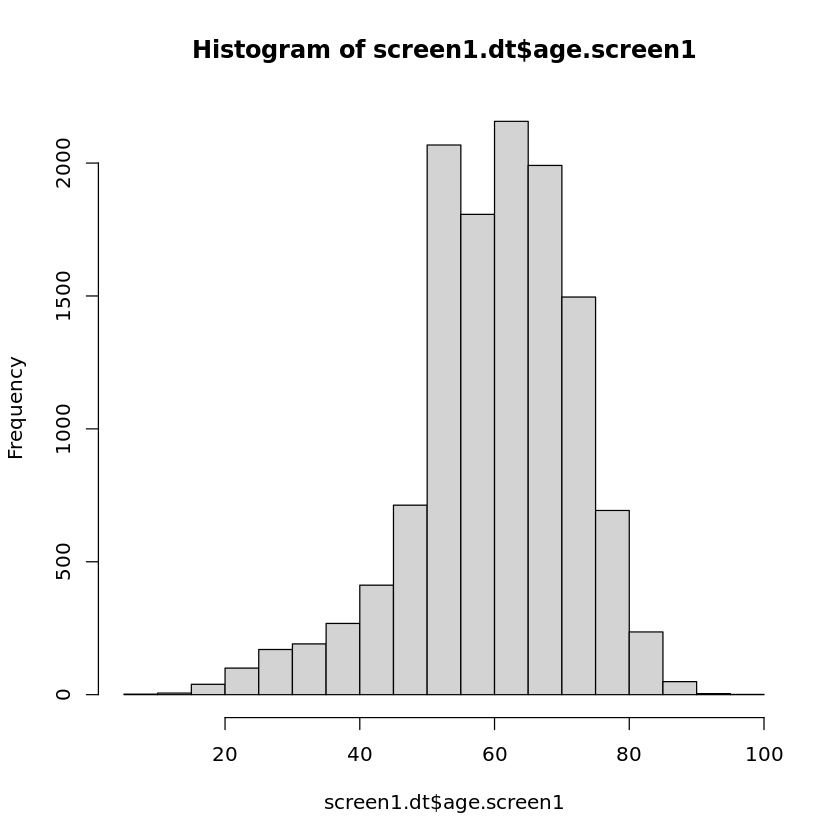

In [105]:
# look at distribution of age.screen1
hist(screen1.dt$age.screen1)

In [ ]:
# get oldest screening age for screened controls
# stool
setkey(person.dt,"person_id")
stool.screen.keep.maxage.dt <- stool.screen.keep.dt[][stool.screen.keep.dt$measurement_datetime == stool.screen.keep.dt$MAX]
stool.screen.keep.maxage.dt <- unique(stool.screen.keep.maxage.dt,by="person_id")
setkey(stool.screen.keep.maxage.dt, "person_id")
merge.dt <- merge(person.dt,stool.screen.keep.maxage.dt,all=TRUE)
merge.dt[,measurement_datetime:=as.Date(measurement_datetime)]
describe(merge.dt$dob)
describe(merge.dt$dob[merge.dt$SCREENED==1])
describe(merge.dt$dob[merge.dt$SCREENED==0])

merge.dt[,age.screen2:=as.duration(as.period(interval(end=measurement_datetime, start=dob)))/dyears(x = 1)]
describe(merge.dt$age.screen2)
screen2.dt <- merge.dt[,list(person_id, SCREENED, age.screen2)][!is.na(merge.dt$age.screen2)]
describe(screen2.dt)

In [107]:
#check if we have anyone more than once 
length(screen1.dt$person_id)
length(unique(screen1.dt$person_id))
length(screen2.dt$person_id)
length(unique(screen2.dt$person_id))
length(age.onset.dt$person_id)
length(unique(age.onset.dt$person_id))


[1] 12403

[1] 12403

[1] 2

[1] 2

[1] 668

[1] 668

In [108]:
names(merge.dt)
length(merge.dt$person_id)
length(unique(merge.dt$person_id))

[1] "person_id"                     "observation_datetime"         
 [3] "gender_concept_id"             "gender"                       
 [5] "date_of_birth"                 "race_concept_id"              
 [7] "race"                          "ethnicity_concept_id"         
 [9] "ethnicity"                     "sex_at_birth_concept_id"      
[11] "sex_at_birth"                  "CRC.status"                   
[13] "CSET1"                         "CSET3"                        
[15] "UC1"                           "UC2"                          
[17] "SCREENED"                      "dob"                          
[19] "date.consent"                  "AGE"                          
[21] "measurement_concept_id"        "standard_concept_name"        
[23] "standard_concept_code"         "standard_vocabulary"          
[25] "measurement_datetime"          "measurement_type_concept_id"  
[27] "measurement_type_concept_name" "operator_concept_id"          
[29] "operator_concept_name"         "value_as_number"              
[31] "value_as_concept_id"           "value_as_concept_name"        
[33] "unit_concept_id"               "unit_concept_name"            
[35] "range_low"                     "range_high"                   
[37] "visit_occurrence_id"           "visit_occurrence_concept_name"
[39] "measurement_source_value"      "measurement_source_concept_id"
[41] "source_concept_name"           "source_concept_code"          
[43] "source_vocabulary"             "unit_source_value"            
[45] "value_source_value"            "count"                        
[47] "MIN"                           "MAX"                          
[49] "time.diff"                     "age.screen2"

[1] 98312

[1] 98312

In [ ]:
# merge in the age of onset and age.screen1 
setkeyv(age.onset.dt,c("person_id","CRC.status"))
setkeyv(merge.dt,c("person_id","CRC.status"))
merge2.dt <- merge(age.onset.dt,merge.dt,all=TRUE)
describe(merge2.dt$age.of.onset)
length(merge2.dt$person_id)
length(unique(merge2.dt$person_id))

In [ ]:
setkeyv(screen1.dt,c("person_id","SCREENED"))
setkeyv(merge2.dt,c("person_id","SCREENED"))
merge3.dt <- merge(screen1.dt, merge2.dt, all=TRUE)
describe(merge3.dt$age.screen1)
length(merge3.dt$person_id)
length(unique(merge3.dt$person_id))

In [ ]:
# get censsored age
merge3.dt[,censored.age:=ifelse(CRC.status==0,AGE,age.of.onset)]
merge3.dt[,censored.age:=ifelse( (!is.na(age.screen1) & SCREENED==1),age.screen1,censored.age)]
merge3.dt[,censored.age:=ifelse( (!is.na(age.screen2) & SCREENED==1),age.screen2,censored.age)]
describe(merge3.dt$censored.age)
describe(merge3.dt$censored.age[merge.dt$CRC.status==1])
describe(merge3.dt$censored.age[merge.dt$SCREENED==1])
describe(merge3.dt$censored.age[merge.dt$CRC.status==0])

In [112]:
names(merge3.dt)
length(merge3.dt$person_id)
length(unique(merge3.dt$person_id))


[1] "person_id"                     "SCREENED"                     
 [3] "age.screen1"                   "CRC.status"                   
 [5] "age.of.onset"                  "observation_datetime"         
 [7] "gender_concept_id"             "gender"                       
 [9] "date_of_birth"                 "race_concept_id"              
[11] "race"                          "ethnicity_concept_id"         
[13] "ethnicity"                     "sex_at_birth_concept_id"      
[15] "sex_at_birth"                  "CSET1"                        
[17] "CSET3"                         "UC1"                          
[19] "UC2"                           "dob"                          
[21] "date.consent"                  "AGE"                          
[23] "measurement_concept_id"        "standard_concept_name"        
[25] "standard_concept_code"         "standard_vocabulary"          
[27] "measurement_datetime"          "measurement_type_concept_id"  
[29] "measurement_type_concept_name" "operator_concept_id"          
[31] "operator_concept_name"         "value_as_number"              
[33] "value_as_concept_id"           "value_as_concept_name"        
[35] "unit_concept_id"               "unit_concept_name"            
[37] "range_low"                     "range_high"                   
[39] "visit_occurrence_id"           "visit_occurrence_concept_name"
[41] "measurement_source_value"      "measurement_source_concept_id"
[43] "source_concept_name"           "source_concept_code"          
[45] "source_vocabulary"             "unit_source_value"            
[47] "value_source_value"            "count"                        
[49] "MIN"                           "MAX"                          
[51] "time.diff"                     "age.screen2"                  
[53] "censored.age"

[1] 98312

[1] 98312

In [ ]:
#check for people with both screening ages and take the maximum
merge3.dt[,list(person_id, censored.age, age.screen1, age.screen2)][!is.na(merge3.dt$age.screen1) &
                                                                    !is.na(merge3.dt$age.screen2)]


In [114]:
merge3.dt[,censored.age:=ifelse(!is.na(age.screen1) & !is.na(age.screen2), max(age.screen1, age.screen2, na.rm=TRUE), censored.age), by=person_id]

In [ ]:
merge3.dt[,list(person_id, censored.age, age.screen1, age.screen2)][!is.na(merge3.dt$age.screen1) &
                                                                    !is.na(merge3.dt$age.screen2)]

In [ ]:
# remove participants that were screened as children
screened.children <- merge3.dt$person_id[merge3.dt$SCREENED==1 & merge3.dt$censored.age < 18]
length(screened.children)
merge4.dt <- merge3.dt[][!(merge3.dt$SCREENED==1 & merge3.dt$censored.age < 18)]
describe(merge4.dt$censored.age)

In [ ]:
# why are there missing ages? Appears that the zip code data is missing for those participants
missing.age <- merge4.dt$person_id[is.na(merge4.dt$censored.age)]
head(person.dt[][person.dt$person_id %in% missing.age])
head(zip.dt[][zip.dt$person_id %in% missing.age])


In [118]:
# remove individuals who have censored age < 18 because we want only adults
# I want to keep those with missing age in case there is an association with race/ethnicity 
merge4.dt <- merge4.dt[][merge4.dt$censored.age >=18 | is.na(merge4.dt$censored.age)]
describe(merge4.dt$censored.age)

merge4.dt$censored.age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   90665     7591    21662        1    51.25    19.05    23.69    27.49 
     .25      .50      .75      .90      .95 
   37.44    52.90    64.28    72.18    76.37 

lowest :  18.00000  18.00548  18.00821  18.01095  18.02738
highest:  99.72142 100.43309 101.01095 103.48238 104.47416

In [119]:
describe(merge4.dt$CRC.status)

merge4.dt$CRC.status 
       n  missing distinct     Info      Sum     Mean      Gmd 
   98256        0        2     0.02      668 0.006799   0.0135 


In [120]:
# determine dob and who was born too late to be considered over 18
describe(merge.dt$date_of_birth)

merge.dt$date_of_birth 
       n  missing distinct 
   98312        0       87 

lowest : 1915-06-15 00:00:00 UTC 1916-06-15 00:00:00 UTC 1918-06-15 00:00:00 UTC 1919-06-15 00:00:00 UTC 1920-06-15 00:00:00 UTC
highest: 1999-06-15 00:00:00 UTC 2000-06-15 00:00:00 UTC 2001-06-15 00:00:00 UTC 2002-06-15 00:00:00 UTC 2003-06-15 00:00:00 UTC

In [121]:
# April 30, 2021
(compare.date <- as.Date("2021-04-30"))
merge4.dt[,check.age:=as.duration(as.period(interval(end=compare.date, start=dob)))/dyears(x = 1)]
describe(merge4.dt$check.age)
# Everyone is over 18 if we use the date cutoff supplied by Tamara Litwin, age at CDR
# I won't remove anyone at this point

[1] "2021-04-30"

merge4.dt$check.age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   98256        0       86        1    53.47    19.39    25.87    29.87 
     .25      .50      .75      .90      .95 
   38.87    54.87    66.87    74.87    78.87 

lowest :  18.8744  19.8744  20.8744  21.8744  22.8744
highest: 100.8744 101.8744 102.8744 104.8744 105.8744

In [122]:
names(merge4.dt)

[1] "person_id"                     "SCREENED"                     
 [3] "age.screen1"                   "CRC.status"                   
 [5] "age.of.onset"                  "observation_datetime"         
 [7] "gender_concept_id"             "gender"                       
 [9] "date_of_birth"                 "race_concept_id"              
[11] "race"                          "ethnicity_concept_id"         
[13] "ethnicity"                     "sex_at_birth_concept_id"      
[15] "sex_at_birth"                  "CSET1"                        
[17] "CSET3"                         "UC1"                          
[19] "UC2"                           "dob"                          
[21] "date.consent"                  "AGE"                          
[23] "measurement_concept_id"        "standard_concept_name"        
[25] "standard_concept_code"         "standard_vocabulary"          
[27] "measurement_datetime"          "measurement_type_concept_id"  
[29] "measurement_type_concept_name" "operator_concept_id"          
[31] "operator_concept_name"         "value_as_number"              
[33] "value_as_concept_id"           "value_as_concept_name"        
[35] "unit_concept_id"               "unit_concept_name"            
[37] "range_low"                     "range_high"                   
[39] "visit_occurrence_id"           "visit_occurrence_concept_name"
[41] "measurement_source_value"      "measurement_source_concept_id"
[43] "source_concept_name"           "source_concept_code"          
[45] "source_vocabulary"             "unit_source_value"            
[47] "value_source_value"            "count"                        
[49] "MIN"                           "MAX"                          
[51] "time.diff"                     "age.screen2"                  
[53] "censored.age"                  "check.age"

In [ ]:
output <- merge4.dt[,list(person_id,dob,AGE,age.of.onset, age.screen1, age.screen2, censored.age,CRC.status,
                          CSET1,CSET3,UC1,UC2,SCREENED,sex_at_birth, gender, race, ethnicity)]
describe(output)
#output[][output$CRC.status !=1 & output$CSET1==1]
#output[][output$CRC.status !=1 & output$CSET2==1]
#length(case.set1)
#length(case.set2)
#length(case.set3)

In [128]:
# Need to output as tab separated values because there are commas in some of the column variables
outfile <- "CRC-case-control-phekb-2022-10-17.tsv"
write.table(output,outfile,quote=FALSE,row.names=FALSE,sep="\t")
#cp.command <- paste0("gsutil -m cp -r ",outfile," gs://fc-secure-30fdbdfd-a46b-406d-9617-1bc69ae1da9d/")
cp.command <- paste0("gsutil -m cp -r ",outfile," gs://fc-secure-91b7b957-58d8-4142-b93b-c3a2635f2d78/")
system(cp.command)